In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df1=pd.read_csv('bike sharing data.csv')

In [3]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df1.shape

(10886, 12)

# Data cleaning

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df1['season'].replace({1: 'spring', 2: 'summer', 3:'fall', 4:'winter'},inplace=True)
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [7]:
df1.head(30)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,spring,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,spring,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,spring,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,spring,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,spring,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [8]:
# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

In [9]:
df1['holiday'].replace({0: False, 1: True},inplace=True)
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,False,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,False,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,False,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,False,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,False,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,False,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,False,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,False,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,False,1,1,13.94,17.425,61,6.0032,12,117,129


In [10]:
df1['workingday'].replace({0: False, 1: True},inplace=True)
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,False,False,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,False,False,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,False,False,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,False,False,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,False,False,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,False,True,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,False,True,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,False,True,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,False,True,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
df1['weather'].replace({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                       3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 
                       4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' },inplace=True)
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,False,True,"Clear, Few clouds, Partly cloudy, Partly cloudy",15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,False,True,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,False,True,"Clear, Few clouds, Partly cloudy, Partly cloudy",13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,False,True,"Clear, Few clouds, Partly cloudy, Partly cloudy",13.94,17.425,61,6.0032,12,117,129


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  bool   
 3   workingday  10886 non-null  bool   
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(3)
memory usage: 871.9+ KB


In [13]:
df1['time']=df1['datetime'].apply(lambda x: x.split(' ')[1])
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01 00:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,00:00:00
1,2011-01-01 01:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,01:00:00
2,2011-01-01 02:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,02:00:00
3,2011-01-01 03:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13,03:00:00
4,2011-01-01 04:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1,04:00:00


In [14]:
df1['datetime']=df1['datetime'].apply(lambda x: x.split(' ')[0])
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,00:00:00
1,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,01:00:00
2,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,02:00:00
3,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13,03:00:00
4,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1,04:00:00


In [15]:
df1=df1.rename(columns={"datetime": "date"})
df1.head()

,date,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,00:00:00
1,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,01:00:00
2,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,02:00:00
3,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13,03:00:00
4,2011-01-01,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1,04:00:00


In [16]:
list(df1.columns.values)

['date',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'time']

In [17]:
df1 = df1[['date', 'time', 
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed','casual',
 'registered',
 'count']]

In [18]:
df1.head()

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,00:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16
1,2011-01-01,01:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40
2,2011-01-01,02:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32
3,2011-01-01,03:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13
4,2011-01-01,04:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1


In [19]:
df1.isnull().sum()

date          0
time          0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [20]:
df1['date'] = pd.to_datetime(df1['date'])

In [21]:
df1.head()

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,00:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16
1,2011-01-01,01:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40
2,2011-01-01,02:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32
3,2011-01-01,03:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13
4,2011-01-01,04:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        10886 non-null  datetime64[ns]
 1   time        10886 non-null  object        
 2   season      10886 non-null  object        
 3   holiday     10886 non-null  bool          
 4   workingday  10886 non-null  bool          
 5   weather     10886 non-null  object        
 6   temp        10886 non-null  float64       
 7   atemp       10886 non-null  float64       
 8   humidity    10886 non-null  int64         
 9   windspeed   10886 non-null  float64       
 10  casual      10886 non-null  int64         
 11  registered  10886 non-null  int64         
 12  count       10886 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 956.9+ KB


In [23]:
df1['time']=pd.to_timedelta(df1['time'])
df1.head()

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,0 days 00:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16
1,2011-01-01,0 days 01:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40
2,2011-01-01,0 days 02:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32
3,2011-01-01,0 days 03:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13
4,2011-01-01,0 days 04:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   date        10886 non-null  datetime64[ns] 
 1   time        10886 non-null  timedelta64[ns]
 2   season      10886 non-null  object         
 3   holiday     10886 non-null  bool           
 4   workingday  10886 non-null  bool           
 5   weather     10886 non-null  object         
 6   temp        10886 non-null  float64        
 7   atemp       10886 non-null  float64        
 8   humidity    10886 non-null  int64          
 9   windspeed   10886 non-null  float64        
 10  casual      10886 non-null  int64          
 11  registered  10886 non-null  int64          
 12  count       10886 non-null  int64          
dtypes: bool(2), datetime64[ns](1), float64(3), int64(4), object(2), timedelta64[ns](1)
memory usage: 956.9+ KB


In [25]:
df1['holiday'].groupby(df1['holiday']).count()

holiday
False    10575
True       311
Name: holiday, dtype: int64

In [26]:
df1['workingday'].groupby(df1['workingday']).count()

workingday
False    3474
True     7412
Name: workingday, dtype: int64

# Q) total number of cycles used in holidays

In [27]:
df1[df1['holiday']==True]['count'].sum()

57808

# Q) total number of cycles used in working days?

In [28]:
df1[df1['workingday']==True]['count'].sum()

1430604

# Q) month with maximum number of bike renting?

In [29]:
df1.groupby(df1['date'].dt.month_name(locale = 'English')).sum().drop(['temp','atemp','humidity','windspeed'],axis=1).sort_values(by=['count'], ascending=False)

,holiday,workingday,casual,registered,count
date,,,,,
June,0,624,48574,172159,220733
July,48,600,50947,163670,214617
August,0,672,45870,167646,213516
September,48,573,45901,166628,212529
October,48,623,38087,169347,207434
May,0,672,41285,158862,200147
November,48,599,25353,151087,176440
April,48,597,39813,127589,167402
December,0,624,14700,145460,160160


In [69]:
monthcount=df1.groupby(df1['date'].dt.month_name(locale = 'English')).sum().drop(['temp','atemp','humidity','windspeed','holiday','workingday'],axis=1).reset_index()
monthcount.sort_values(by=['date'],ascending=True)

,date,casual,registered,count
0,April,39813,127589,167402
1,August,45870,167646,213516
2,December,14700,145460,160160
3,February,9297,89816,99113
4,January,7252,72632,79884
5,July,50947,163670,214617
6,June,48574,172159,220733
7,March,25056,108445,133501
8,May,41285,158862,200147
9,November,25353,151087,176440


In [31]:
fig = px.bar(monthcount, x = 'date', y = 'count', title='most busy month')
fig.show()

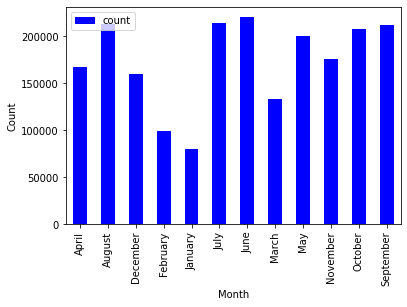

In [70]:
monthcount.plot(kind='bar',x='date',y='count',color='blue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# total cycles hired on a heavy rain day?

In [32]:
df1[df1['weather']=='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']['count'].sum()

164

In [33]:
df1.describe()

,time,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0 days 11:32:29.807091677,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0 days 06:54:57.016689111,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0 days 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0 days 06:00:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0 days 12:00:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0 days 18:00:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,0 days 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# variation of casual and registered bikes as per month

In [34]:
fig = px.line(monthcount, x='date', y=['casual', 'registered'])
fig.show()

In [35]:
##per year data

In [36]:
df2=df1.groupby([df1['date'].dt.year, df1['date'].dt.month_name(locale = 'English')]).sum().drop(['temp','atemp','humidity','windspeed'],axis=1)
df2

holiday  workingday  casual  registered   count
date date                                                      
2011 April           24         287   12229       38288   50517
     August           0         360   17580       65716   83296
     December         0         312    5079       56104   61183
     February         0         327    3776       29068   32844
     January         24         264    2008       21544   23552
     July            24         288   26145       66703   92848
     June             0         312   19600       70176   89776
     March            0         328    7910       30825   38735
     May              0         336   15865       63848   79713
     November        24         312   10155       60734   70889
     October         24         287   17159       62363   79522
     September       24         285   18311       60793   79104
2012 April           24         310   27584       89301  116885
     August           0         312   28290      101930  130220
     December         0         312    9621       89356   98977
     February         0         311    5521       60748   66269
     January         47         286    5244       51088   56332
     July            24         312   24802       96967  121769
     June             0         312   28974      101983  130957
     March            0         312   17146       77620   94766
     May              0         336   25420       95014  120434
     November        24         287   15198       90353  105551
     October         24         336   20928      106984  127912
     September       24         288   27590      105835  133425

In [37]:
df2.iplot()

# what time of the day have max temperature?

In [38]:
temptime=df1.groupby([df1['time']]).mean().reset_index().drop(['humidity','windspeed','holiday','workingday','casual','registered','count'],axis=1)
temptime.sort_values(by=['temp'],ascending=False)

,time,temp,atemp
15,0 days 15:00:00,23.281886,26.832346
14,0 days 14:00:00,23.147018,26.714452
16,0 days 16:00:00,23.118246,26.621382
13,0 days 13:00:00,22.690263,26.249232
17,0 days 17:00:00,22.654298,26.089825
18,0 days 18:00:00,22.107632,25.564748
12,0 days 12:00:00,22.001535,25.501732
19,0 days 19:00:00,21.364956,24.837259
11,0 days 11:00:00,21.262330,24.710231
20,0 days 20:00:00,20.749956,24.272357


# what is the favorite season for casual bikers?

In [39]:
favsea=df1.groupby('season').sum().drop(['holiday','workingday','temp','atemp','humidity','windspeed','registered','count'],axis=1).reset_index()
favsea

,season,casual
0,fall,142718
1,spring,41605
2,summer,129672
3,winter,78140


In [40]:
fig3 = px.bar(favsea, x = 'season', y = 'casual', title='favorite season for casual bikers')
fig3.show()

Text(0, 0.5, 'count')

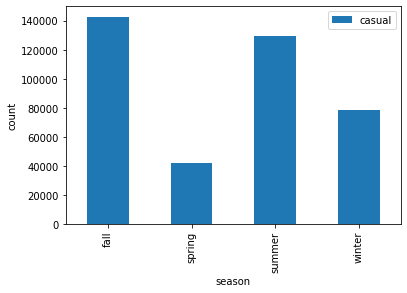

In [75]:
favsea.plot(kind='bar',x='season')
plt.ylabel('count')

# list of days with no holiday and it is a working day with heavy rain?

In [41]:
df1[(df1['holiday']==False) & (df1['workingday']==True) & (df1['weather']=='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')]

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09,0 days 18:00:00,spring,False,True,Heavy Rain + Ice Pallets + Thunderstorm + Mist...,8.2,11.365,86,6.0032,6,158,164


# How many times it rained on non rainy season?

In [42]:
nonrain=df1[(df1['season']!='fall')&((df1['weather']=='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')|(df1['weather']=='Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'))]
nonrain.reset_index()

,index,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,18,2011-01-01,0 days 18:00:00,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,88,16.9979,9,26,35
1,19,2011-01-01,0 days 19:00:00,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,88,16.9979,6,31,37
2,29,2011-01-02,0 days 06:00:00,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,77,19.9995,0,2,2
3,31,2011-01-02,0 days 08:00:00,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",16.40,20.455,71,15.0013,0,8,8
4,37,2011-01-02,0 days 14:00:00,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",14.76,17.425,76,12.9980,4,55,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,10808,2012-12-16,0 days 18:00:00,winter,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",15.58,19.695,82,7.0015,8,99,107
657,10818,2012-12-17,0 days 04:00:00,winter,False,True,"Light Snow, Light Rain + Thunderstorm + Scatte...",14.76,18.940,100,0.0000,2,3,5
658,10830,2012-12-17,0 days 16:00:00,winter,False,True,"Light Snow, Light Rain + Thunderstorm + Scatte...",16.40,20.455,94,16.9979,15,287,302
659,10837,2012-12-17,0 days 23:00:00,winter,False,True,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,94,15.0013,6,41,47


In [43]:
##answer= 661 times